**Agglomerative Clustering**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [ ]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics.cluster import pair_confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
breast_cancer=datasets.load_breast_cancer()

In [ ]:
X = breast_cancer.data
y = breast_cancer.target

In [ ]:
X_scaled = scaler.fit_transform(breast_cancer.data)

In [ ]:
agg = AgglomerativeClustering(2)
np.random.seed(15)
agg_ward = AgglomerativeClustering(n_clusters = 2, linkage = "ward",compute_distances=True)
agg_complete = AgglomerativeClustering(n_clusters = 2, linkage = "complete",compute_distances=True)
agg_average = AgglomerativeClustering(n_clusters = 2, linkage = "average",compute_distances=True)
agg_single = AgglomerativeClustering(n_clusters = 2, linkage = "single",compute_distances=True)


ypred_ward = agg_ward.fit_predict(X)
ypred_complete = agg_complete.fit_predict(X)
ypred_average = agg_average.fit_predict(X)
ypred_single = agg_single.fit_predict(X)

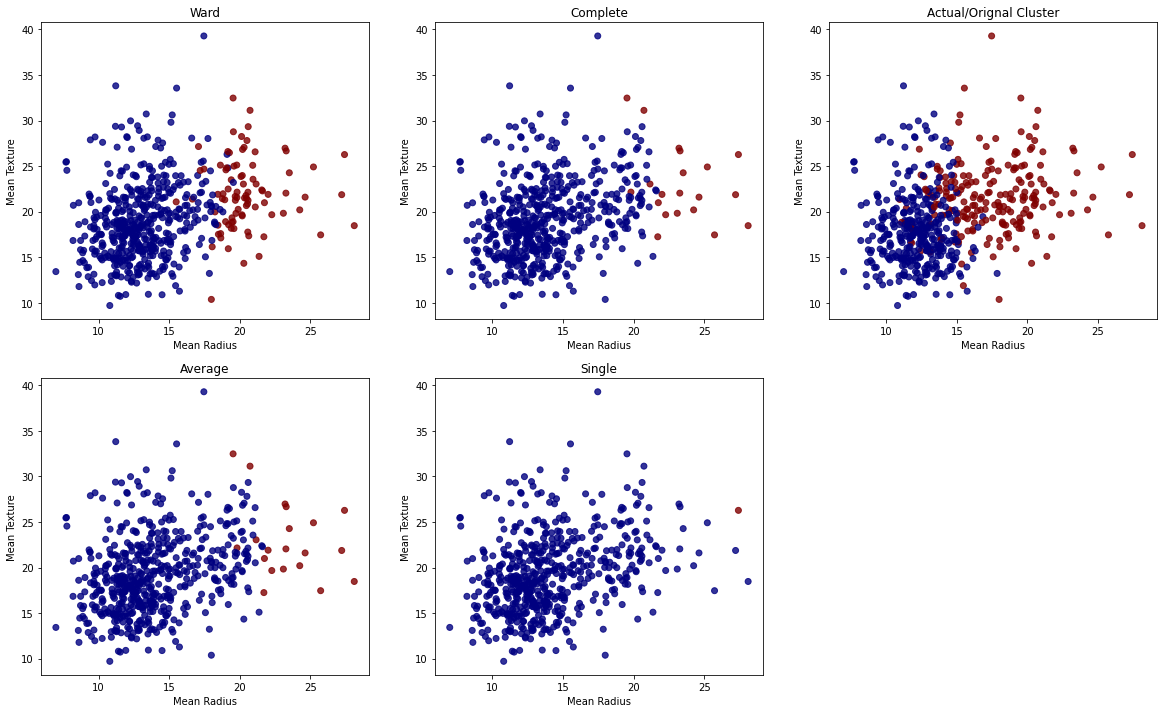

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(231)
plt.scatter(X[:,0],X[:,1],  c=ypred_ward, cmap = "jet",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Ward')

plt.subplot(232)
plt.scatter(X[:,0],X[:,1],  c=ypred_complete, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Complete')

plt.subplot(234)
plt.scatter(X[:,0],X[:,1],  c=ypred_average, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Average')

plt.subplot(235)
plt.scatter(X[:,0],X[:,1],  c=ypred_single, cmap = "jet",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Single')

plt.subplot(233)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()


In [ ]:
model_dict={'Ward':ypred_ward,'Complete':ypred_complete,'Average':ypred_average,'Single':ypred_single}


In [ ]:
score = {}
for model,pred in model_dict.items():
  list=[]
  list.append((pred == y).sum())
  list.append(np.round(metrics.calinski_harabasz_score(X, pred),4))
  list.append(np.round(metrics.homogeneity_score(y, pred),4))
  list.append(np.round(metrics.completeness_score(y, pred),4))
  list.append(np.round(metrics.v_measure_score(y,pred),4))
  list.append(np.round(metrics.rand_score(y,pred),4))
  list.append(np.round(metrics.adjusted_rand_score(y,pred),4))
  list.append(np.round(metrics.silhouette_score(X, pred, metric='euclidean'),4))
  list.append(np.round(metrics.davies_bouldin_score(X, pred),4))
  list.append(np.round(metrics.fowlkes_mallows_score(y, pred),4))
  score[model] = list

In [ ]:
columns=['Correct Predictions','Calinski Harbaz Score','Homogeneity Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score','Sillhouette Score','Davies Bouldin Score','Fowlkes Mallows Score']

In [ ]:
import pandas as pd
df = pd.DataFrame(score,index=columns)
df.T

,Correct Predictions,Calinski Harbaz Score,Homogeneity Score,Completness Score,V measure Score,Rand Score,Adjusted Rand Score,Sillhouette Score,Davies Bouldin Score,Fowlkes Mallows Score
Ward,126.0,1088.1624,0.2622,0.4076,0.3191,0.6546,0.2872,0.6900,0.4795,0.7392
Complete,377.0,334.3356,0.0542,0.2351,0.0881,0.5521,0.0523,0.6909,0.4290,0.7215
Average,377.0,334.3356,0.0542,0.2351,0.0881,0.5521,0.0523,0.6909,0.4290,0.7215
Single,211.0,35.4336,0.0026,0.1347,0.0052,0.5326,0.0024,0.7990,0.1282,0.7286


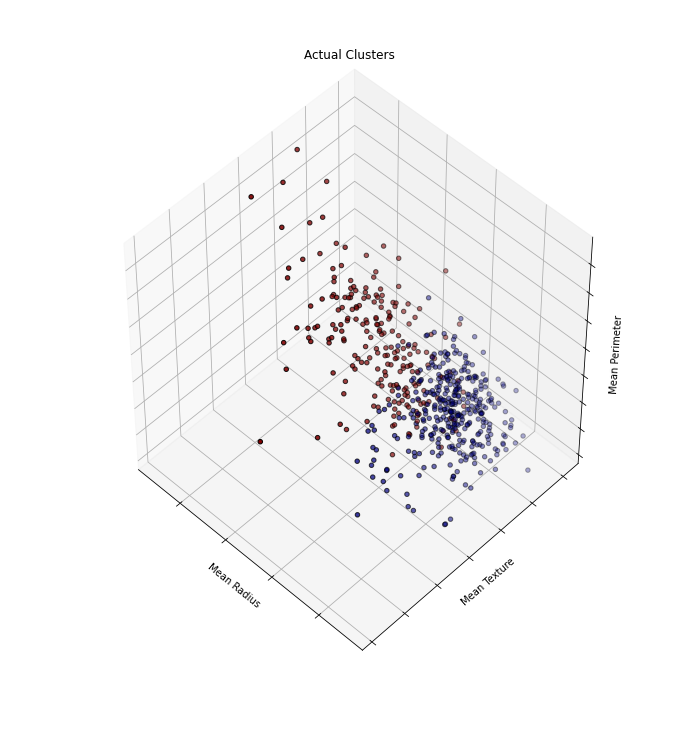

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='jet_r', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('Actual Clusters')
ax.dist=12

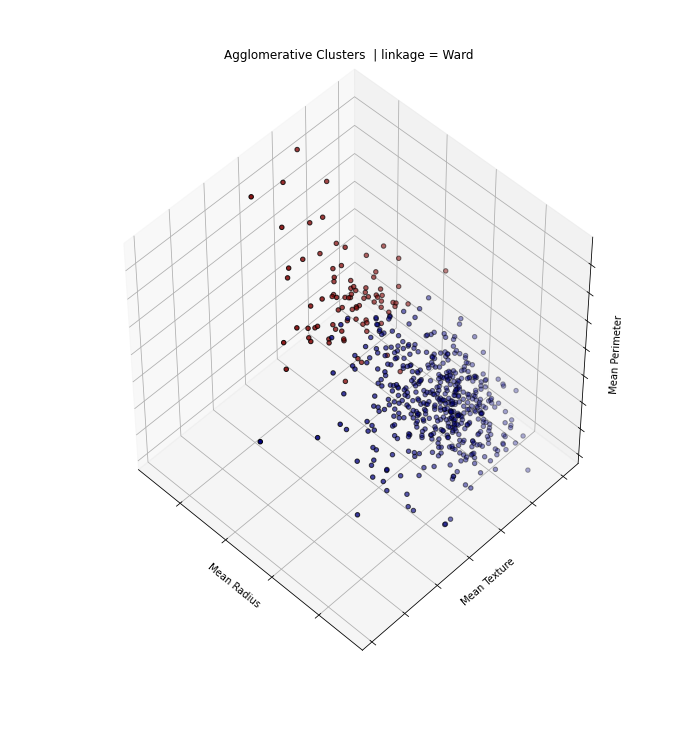

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=ypred_ward, cmap='jet', edgecolor="k")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Mean Radius")
ax.set_ylabel("Mean Texture")
ax.set_zlabel("Mean Perimeter")
ax.set_title('Agglomerative Clusters  | linkage = Ward')
ax.dist=12

In [ ]:
estimators = [
    ("AGG_2", AgglomerativeClustering(n_clusters = 2,compute_distances = True)),
    ("AGG_3", AgglomerativeClustering(n_clusters = 3,compute_distances = True)),
    ("AGG_4", AgglomerativeClustering(n_clusters = 4,compute_distances = True)),
    ("AGG_5", AgglomerativeClustering(n_clusters = 5,compute_distances = True)),
    ("AGG_2_cosine", AgglomerativeClustering(n_clusters = 2,linkage='complete',affinity='cosine',compute_distances = True)),
    ("AGG_2_l1", AgglomerativeClustering(n_clusters = 2,linkage='complete',affinity='l1',compute_distances = True)),
    ("AGG_2_l2", AgglomerativeClustering(n_clusters = 2,linkage='complete',affinity='l2',compute_distances = True)),
]

In [ ]:
score_metrics={}
models = {}
for name,est in estimators:
  labels = est.fit_predict(X)
  list=[]  
  if ('2' in name):
    list.append((labels == y).sum())
  else:
    list.append('-')
    #list.append((labels == y).sum())
  models['ypred_'+name] =  labels
  list.append(np.round(metrics.calinski_harabasz_score(X, labels),4))
  list.append(np.round(metrics.homogeneity_score(y, labels),4))
  list.append(np.round(metrics.completeness_score(y, labels),4))
  list.append(np.round(metrics.v_measure_score(y,labels),4))
  list.append(np.round(metrics.rand_score(y,labels),4))
  list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
  list.append(np.round(metrics.silhouette_score(X, labels, metric='euclidean'),4))
  list.append(np.round(metrics.davies_bouldin_score(X, labels),4))
  list.append(np.round(metrics.fowlkes_mallows_score(y, labels),4))
  score_metrics[name] = list

In [ ]:
df1 = pd.DataFrame(score_metrics,index=columns)
df1.T.sort_values('Adjusted Rand Score')

,Correct Predictions,Calinski Harbaz Score,Homogeneity Score,Completness Score,V measure Score,Rand Score,Adjusted Rand Score,Sillhouette Score,Davies Bouldin Score,Fowlkes Mallows Score
AGG_2_l1,377.0,334.3356,0.0542,0.2351,0.0881,0.5521,0.0523,0.6909,0.429,0.7215
AGG_2_l2,377.0,334.3356,0.0542,0.2351,0.0881,0.5521,0.0523,0.6909,0.429,0.7215
AGG_2_cosine,168.0,181.4638,0.1241,0.301,0.1757,0.5831,0.1267,0.4988,0.8955,0.7198
AGG_2,126.0,1088.1624,0.2622,0.4076,0.3191,0.6546,0.2872,0.69,0.4795,0.7392
AGG_4,-,1245.5676,0.5266,0.326,0.4027,0.6856,0.3806,0.509,0.6091,0.6646
AGG_3,-,1089.9294,0.5266,0.3447,0.4167,0.6907,0.3903,0.5083,0.6314,0.6714
AGG_5,-,1541.8595,0.6237,0.3202,0.4232,0.6965,0.4063,0.5114,0.6114,0.6652


Text(0.5, 1.0, 'Complete')

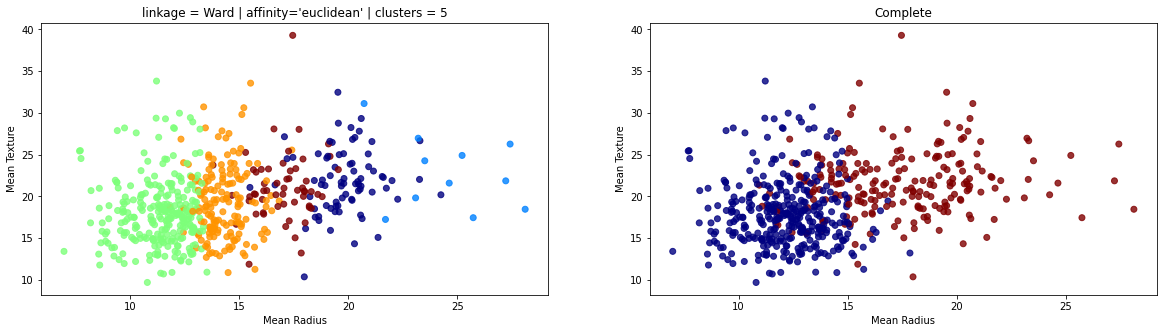

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.scatter(X[:,0],X[:,1],  c=models['ypred_AGG_5'], cmap = "jet",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('linkage = Ward | affinity=\'euclidean\' | clusters = 5')

plt.subplot(122)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Complete')

# Scaling

In [ ]:
score_metrics_scaled={}
models_scaled = {}
for name,est in estimators:
  labels = est.fit_predict(X_scaled)
  list=[]  
  if ('2' in name):
    list.append((labels == y).sum())
  else:
    list.append('-')
    #list.append((labels == y).sum())
  models_scaled['ypred_'+name] =  labels
  list.append(np.round(metrics.calinski_harabasz_score(X_scaled, labels),4))
  list.append(np.round(metrics.homogeneity_score(y, labels),4))
  list.append(np.round(metrics.completeness_score(y, labels),4))
  list.append(np.round(metrics.v_measure_score(y,labels),4))
  list.append(np.round(metrics.rand_score(y,labels),4))
  list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
  list.append(np.round(metrics.silhouette_score(X_scaled, labels, metric='euclidean'),4))
  list.append(np.round(metrics.davies_bouldin_score(X_scaled, labels),4))
  list.append(np.round(metrics.fowlkes_mallows_score(y, labels),4))
  score_metrics_scaled[name] = list

In [ ]:
df1_scaled = pd.DataFrame(score_metrics_scaled,index=columns)
df1_scaled.T.sort_values('Adjusted Rand Score')

,Correct Predictions,Calinski Harbaz Score,Homogeneity Score,Completness Score,V measure Score,Rand Score,Adjusted Rand Score,Sillhouette Score,Davies Bouldin Score,Fowlkes Mallows Score
AGG_2_l2,210.0,27.8727,0.0053,0.1489,0.0102,0.5335,0.0048,0.6607,0.4497,0.7281
AGG_5,-,116.735,0.5547,0.3499,0.4291,0.7515,0.5038,0.2434,1.6247,0.7568
AGG_3,-,182.1739,0.504,0.3946,0.4427,0.7685,0.5363,0.3301,1.5564,0.7785
AGG_4,-,138.0905,0.5547,0.4039,0.4674,0.7719,0.5434,0.2982,1.4848,0.7807
AGG_2_l1,73.0,224.997,0.4347,0.4873,0.4595,0.7759,0.5461,0.3313,1.3428,0.8034
AGG_2,501.0,248.6288,0.4462,0.4681,0.4569,0.7892,0.575,0.3394,1.37,0.8075
AGG_2_cosine,47.0,245.4638,0.5967,0.6477,0.6211,0.8482,0.6932,0.3344,1.3086,0.8645


No handles with labels found to put in legend.


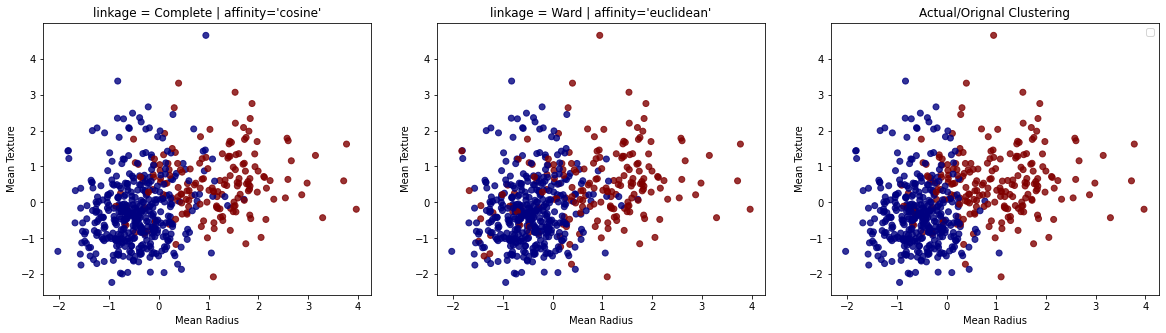

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=models_scaled['ypred_AGG_2_cosine'], cmap = "jet",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('linkage = Complete | affinity=\'cosine\'')

plt.subplot(132)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=models_scaled['ypred_AGG_2'], cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('linkage = Ward | affinity=\'euclidean\'')

plt.subplot(133)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=y, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Clustering')

plt.legend()
plt.show()